### 4.5 OHLC와 캔들 차트

4.5.2 셀트리온 종가 차트

In [1]:
from bs4 import BeautifulSoup
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

In [6]:
# 4.4.4 전체 페이지 읽어오기
import pandas as pd

df = pd.DataFrame()

sise_url = 'https://finance.naver.com/item/sise_day.naver?code=068270'

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df._append(pd.read_html(html, header=0)[0])

In [9]:
# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')

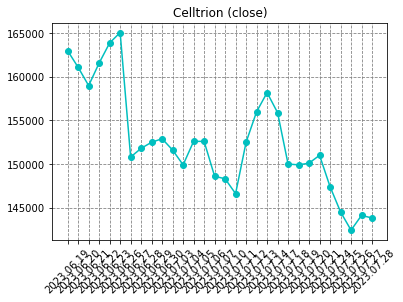

In [10]:
from matplotlib import pyplot as plt

# 날짜, 종가 칼럼으로 차트 그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)  # ③
plt.plot(df['날짜'], df['종가'], 'co-')  # ④
plt.grid(color='gray', linestyle='--')
plt.show()